In [ ]:
# based on https://github.com/pytorch/examples/blob/master/time_sequence_prediction/train.py
# -*- coding: utf-8 -*-
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(123)


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 50, 1, 100, 1
epochs = 5000

# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
#x = Variable(torch.Tensor(N,1).uniform_(1,20), requires_grad=False) # input values
#y = Variable(torch.randn(N, D_out), requires_grad=False)

x = Variable(torch.randn(N, D_in).uniform_(-20,20), requires_grad=False)
a, b, c  = 1, 2, 1
y = a*x**2 + b*x + c # target values
y = b*np.exp(a*x) + c

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Variables for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
   # torch.nn.Linear(H, H),
   # torch.nn.ReLU(),
   # torch.nn.Linear(H, H),
   # torch.nn.ReLU(),
   # torch.nn.Linear(H, H),
   # torch.nn.ReLU(),
   # torch.nn.Linear(H, H),
   # torch.nn.ReLU(),
   # torch.nn.Linear(H, H),
   # torch.nn.ReLU(),
   # torch.nn.Linear(H, H),
   # torch.nn.ReLU(),
   # torch.nn.Linear(H, H),
   # torch.nn.ReLU(),
  #  torch.nn.Linear(H, H),
  #  torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(size_average=False)
#loss_fn = torch.nn.MSELoss(size_average=False, reduce=False)


for t in range(10*epochs):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Variable of input data to the Module and it produces
    # a Variable of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Variables containing the predicted and true
    # values of y, and the loss function returns a Variable containing the
    # loss.
    loss = loss_fn(y_pred, y)
    #print(t, loss.data[0])

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Variables with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # update learning rate
    learning_rate = 1.e-7*np.exp(-t/float(epochs))
    
    # Update the weights using gradient descent. Each parameter is a Variable, so
    # we can access its data and gradients like we did before.
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data
        
    #  break 
    if (loss_fn(model(x), y).data[0]/N) < 5:
        break

# control figure
print ("chi2ndf =%f"%(loss_fn(model(x), y).data[0]/N))
plt.subplots()
plt.plot(x.data.numpy(), model(x).data.numpy(), 'gs', label='PyTorch', fillstyle='left', markersize=5) 
plt.plot(x.data.numpy(), y.data.numpy(), 'rs', label='True',fillstyle='none', markersize=8)
plt.legend()
plt.show()

# now test the output in wide range (-100, 100)
x_test = Variable(torch.randn(60, D_in).uniform_(-30,30), requires_grad=False)
y_test = a*x_test**2 + b*x_test + c # target values
plt.subplots()
plt.plot(x_test.data.numpy(), model(x_test).data.numpy(), 'gs', label='PyTorch', fillstyle='left', markersize=5) 
plt.plot(x_test.data.numpy(), y_test.data.numpy(), 'rs', label='True',fillstyle='none', markersize=8)
plt.show()



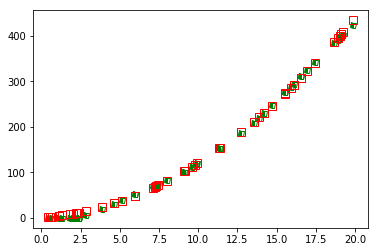

In [65]:
# now test the output with new data that the network hasn't seen but are within what was trained for (0, 20)
x_test = Variable(torch.randn(N, D_in).uniform_(0,20), requires_grad=False)
y_test = a*x_test**2 + b*x_test + c # target values
plt.subplots()
plt.plot(x_test.data.numpy(), model(x_test).data.numpy(), 'gs', label='PyTorch', fillstyle='left', markersize=5) 
plt.plot(x_test.data.numpy(), y_test.data.numpy(), 'rs', label='True',fillstyle='none', markersize=8)
plt.show()

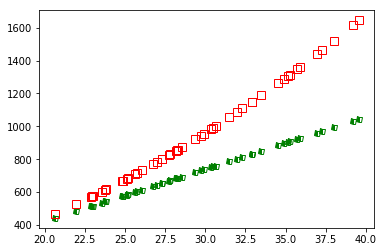

In [59]:
# now test the output in a range that was not trained for (20, 40)
x_test = Variable(torch.randn(N, D_in).uniform_(20,40), requires_grad=False)
y_test = a*x_test**2 + b*x_test + c # target values
plt.subplots()
plt.plot(x_test.data.numpy(), model(x_test).data.numpy(), 'gs', label='PyTorch', fillstyle='left', markersize=5) 
plt.plot(x_test.data.numpy(), y_test.data.numpy(), 'rs', label='True',fillstyle='none', markersize=8)
plt.show()

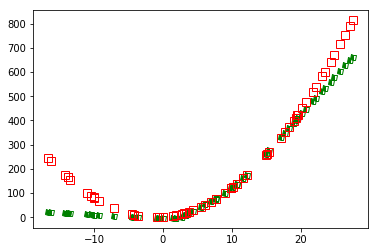

In [37]:
# print network
for param in model.parameters():
    print (param)

Parameter containing:
tensor([[-0.7661],
        [ 0.1941],
        [ 0.4233],
        [ 0.9783],
        [-0.3113],
        [ 0.3689],
        [ 1.2434],
        [-0.4290],
        [ 1.1992],
        [-0.4965],
        [ 0.4836],
        [ 0.4458],
        [ 0.3155],
        [ 0.9132],
        [-0.4042],
        [ 0.2450],
        [ 0.0056],
        [-0.7521],
        [-0.2428],
        [-0.6678],
        [ 0.5041],
        [ 0.0604],
        [ 0.3778],
        [-0.3040],
        [ 0.0472],
        [-0.3110],
        [ 0.3151],
        [ 1.0658],
        [ 0.1805],
        [-0.4436],
        [-0.6108],
        [ 0.2002],
        [-0.7418],
        [-0.7517],
        [-0.6509],
        [-0.3396],
        [ 0.2308],
        [ 0.6719],
        [ 0.4338],
        [ 0.9335],
        [-0.6279],
        [ 0.2994],
        [-0.8889],
        [ 0.7583],
        [ 0.3377],
        [ 1.1734],
        [-0.7112],
        [ 1.0278],
        [ 1.0386],
        [ 1.0491],
        [ 0.2356],
        [

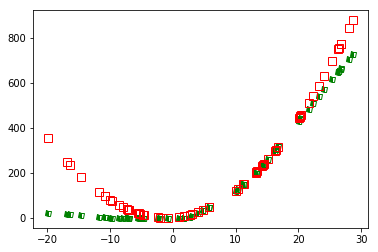

In [62]:
# now test the output in wide range (-20, 30)
x_test = Variable(torch.randn(60, D_in).uniform_(-20,30), requires_grad=False)
y_test = a*x_test**2 + b*x_test + c # target values
plt.subplots()
plt.plot(x_test.data.numpy(), model(x_test).data.numpy(), 'gs', label='PyTorch', fillstyle='left', markersize=5) 
plt.plot(x_test.data.numpy(), y_test.data.numpy(), 'rs', label='True',fillstyle='none', markersize=8)
plt.show()



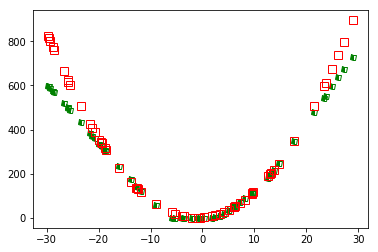

In [70]:
x_test = Variable(torch.randn(60, D_in).uniform_(-30,30), requires_grad=False)
y_test = a*x_test**2 + b*x_test + c # target values
plt.subplots()
plt.plot(x_test.data.numpy(), model(x_test).data.numpy(), 'gs', label='PyTorch', fillstyle='left', markersize=5) 
plt.plot(x_test.data.numpy(), y_test.data.numpy(), 'rs', label='True',fillstyle='none', markersize=8)
plt.show()